# Bank Customer Churn Prediction

### AIM :  Classify if a customer is going to churn or not

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
data=pd.read_csv("C:\\Users\\adite\\Downloads\\Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Understanding

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [5]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [9]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


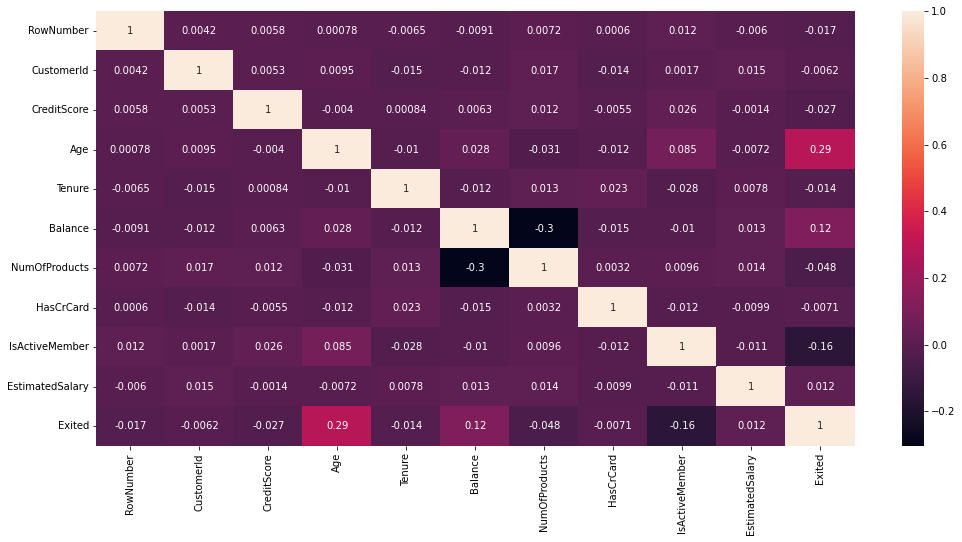

In [11]:
plt.figure(figsize=(17,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

# EDA and Data Visualization

In [12]:
from pylab import rcParams
rcParams["figure.figsize"]=17,8

In [13]:
# Mean of credit card score
data.CreditScore.mean()

650.5288

In [14]:
data.CreditScore.median()

652.0

In [15]:
data.CreditScore.std()

96.65329873613061

In [16]:
data.CreditScore.var()

9341.860156575705

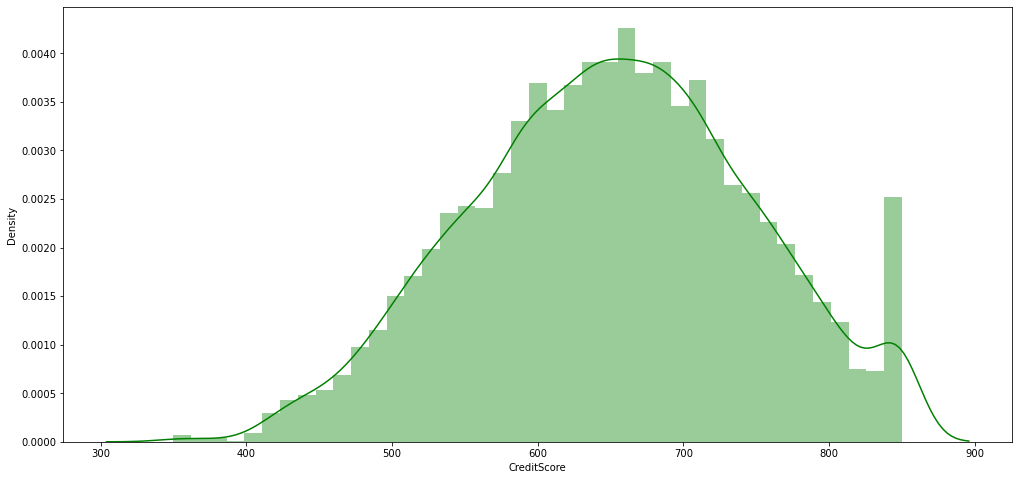

In [17]:
# Lets see the range of people whos credit card score is high

sns.distplot(data.CreditScore,color="green")
plt.show()

### There are many people whose Credit score is between 550 to 750.

In [18]:
data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

#### Here is visual presentation of people who are exited or not from different locations.

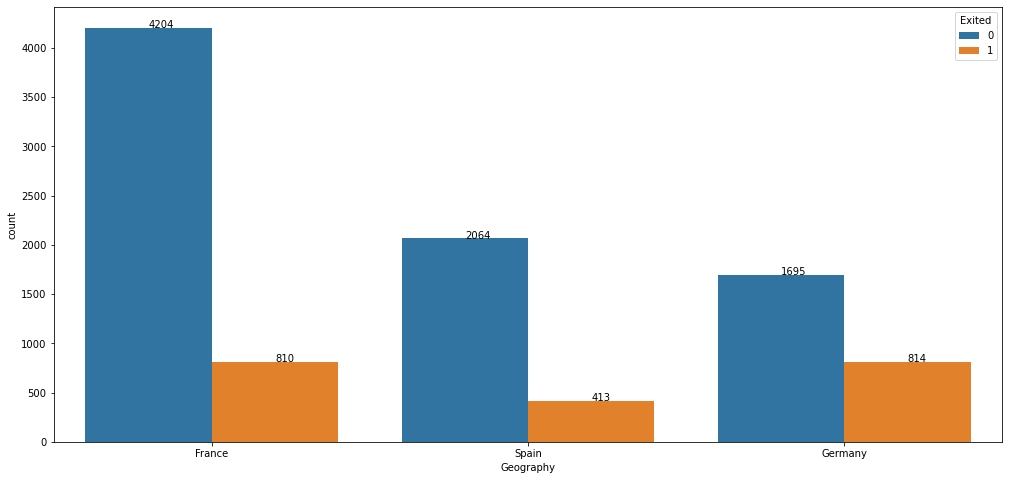

In [19]:
# Checking locations

#sns.countplot(data.Geography)
ax=sns.countplot(data=data,x="Geography",hue="Exited")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.1))

plt.show()

In [20]:
data.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

#### Here is visual presentation of male and female from different locations.

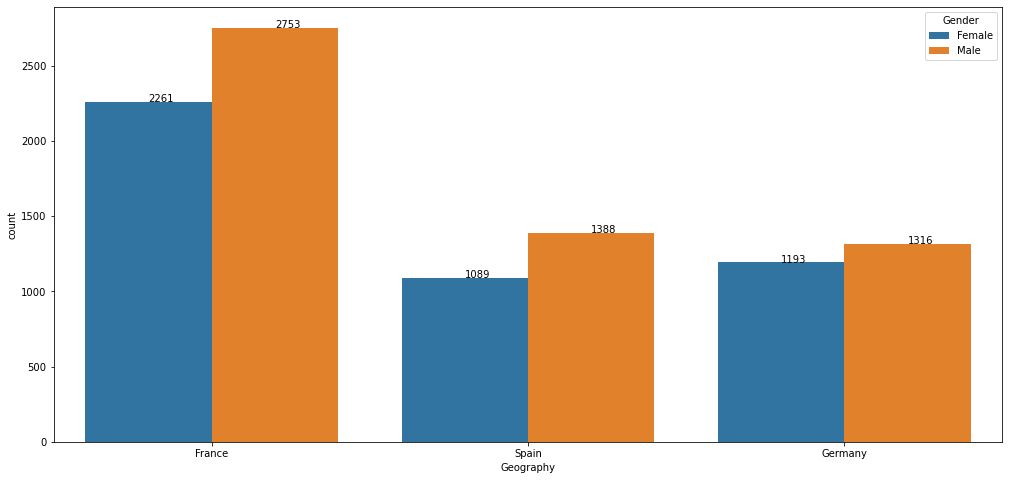

In [21]:
ax=sns.countplot(data=data,x="Geography",hue="Gender")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.1))

plt.show()

#### France branch is loosing more customers that Spain and Germany.

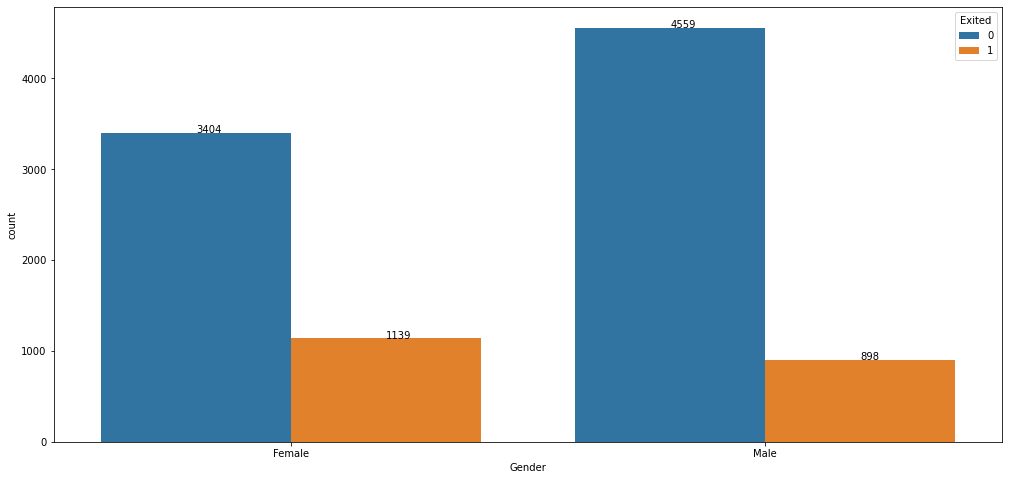

In [22]:
ax=sns.countplot(data=data,x="Gender",hue="Exited")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.1))
plt.show()

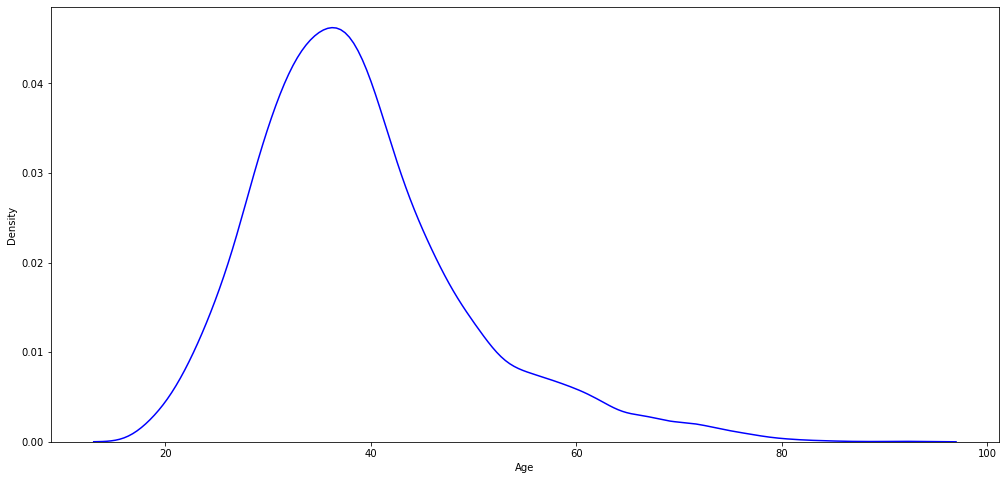

In [23]:
sns.distplot(data.Age,color="blue",hist=False)
plt.show()

In [24]:
data.Age.mean()

38.9218

In [25]:
data.Age.skew()

1.0113202630234552

In [26]:
data.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

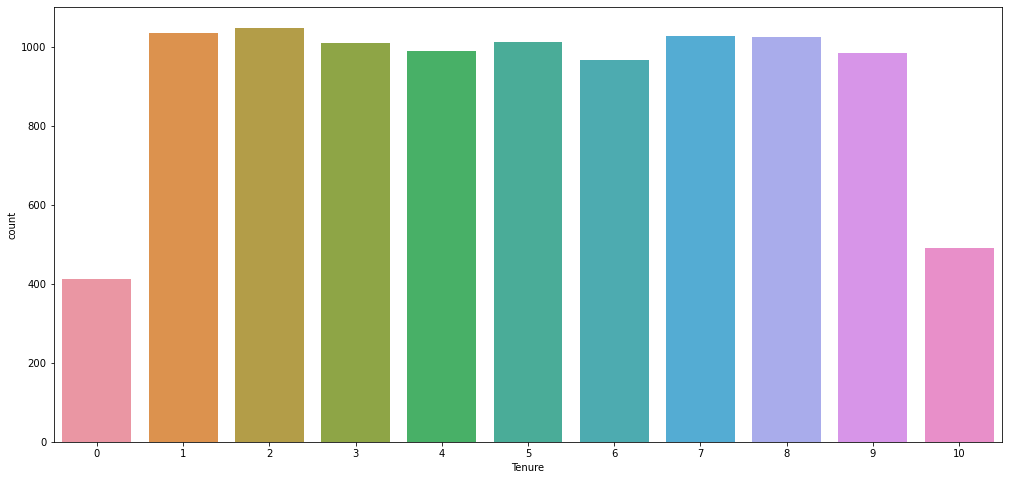

In [27]:
sns.countplot(data=data,x="Tenure")
plt.show()

#### From above plot we can say, the clients on either extreme end are more likely to churn compared to those that are of average tenure.

In [28]:
data.Balance.mean()

76485.88928799961

In [29]:
data.Balance.max()

250898.09

In [30]:
data.Balance.min()

0.0

In [31]:
data.Balance.median()

97198.54000000001

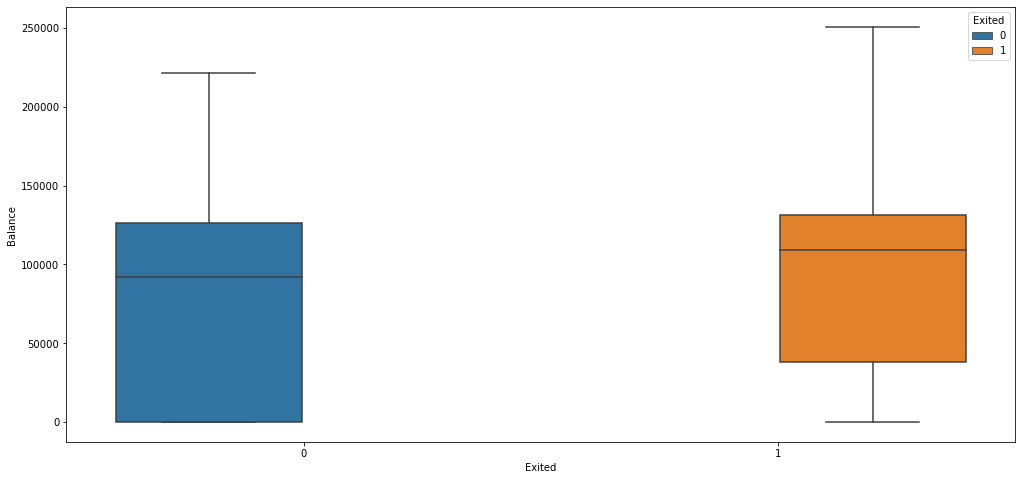

In [32]:
sns.boxplot(data=data,y='Balance',x = 'Exited', hue = 'Exited')

#### From the above boxplot, we can say bank loose more customers of high balance.

In [33]:
data.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [34]:
data.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

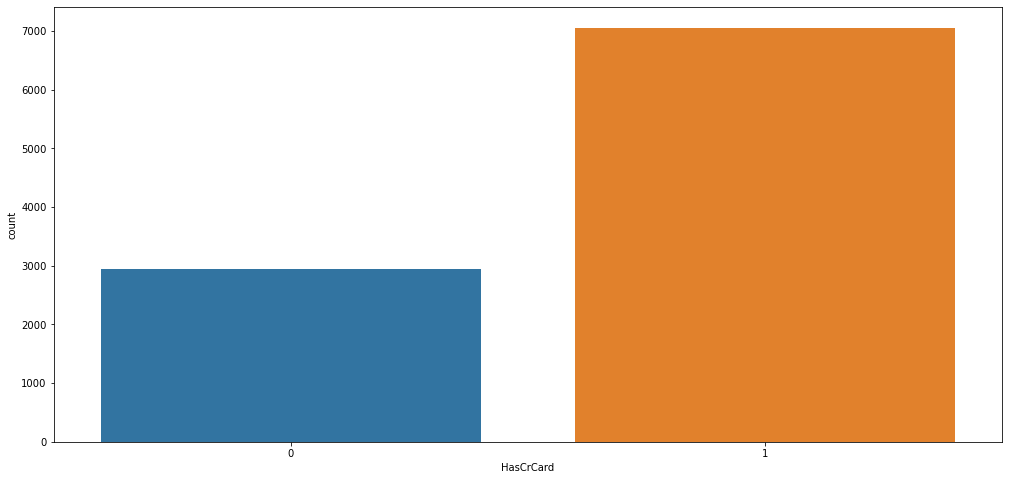

In [35]:
ax=sns.countplot(data=data,x="HasCrCard")
plt.show()

#### From above plot we can say, customers who have credit cards are more likely to left from bank.

In [36]:
data.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

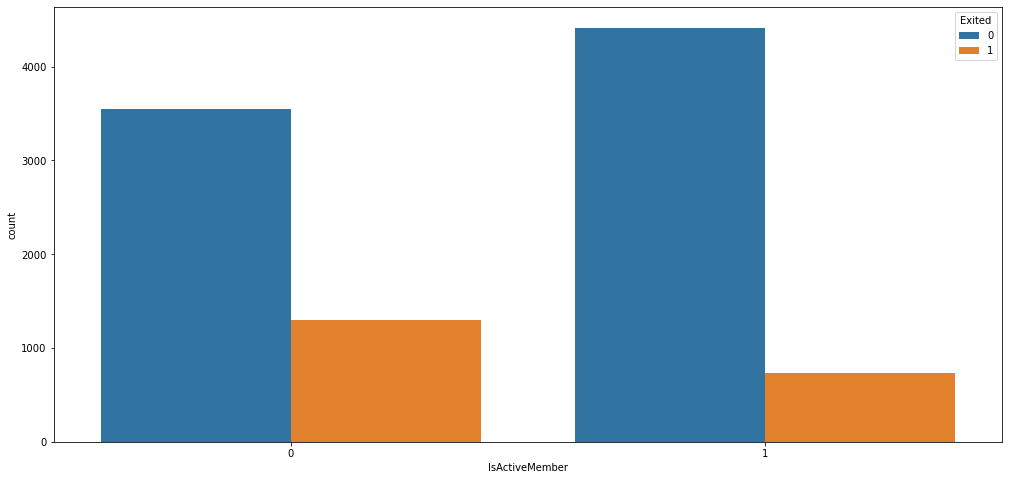

In [37]:
sns.countplot(data=data,x="IsActiveMember",hue="Exited")
plt.show()

#### Here from above graph, we can say that inactive customers have a greater churn than active customers.

In [38]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### We can say that there are 2037 loss of customers of the bank.

#### Here the data is imbalance, so we need to balance it.

# Data Preprocessing

In [39]:
# Here we do not need "RowNumber","CustomerId" and "Surname" columns, so we can drop it.

data=data.drop(["RowNumber","CustomerId","Surname"],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [41]:
data[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [42]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data.Geography=encoder.fit_transform(data.Geography)
data.Gender=encoder.fit_transform(data.Gender)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [43]:
data.Geography.value_counts()
#France (0)    5014
#Germany (1)   2509
#Spain  (2)    2477

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [44]:
data.Gender.value_counts()
#Male (1)     5457
#Female (0)   4543

1    5457
0    4543
Name: Gender, dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


## Data Splitting into x and y

In [46]:
X=data.drop("Exited",axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [47]:
y=data[["Exited"]]
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


# Standardization

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
scaled_X=pd.DataFrame(scaled_X,columns=X.columns)
scaled_X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [49]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
balanced_X,balanced_y=smote.fit_resample(scaled_X,y)
balanced_X.shape,balanced_y.shape

((15926, 10), (15926, 1))

In [50]:
balanced_y.value_counts()

Exited
0         7963
1         7963
dtype: int64

## Performing PCA

In [51]:
from sklearn.decomposition import PCA
pca=PCA()
pca_df=pca.fit_transform(balanced_X)
pca_df

array([[-0.01595144,  0.27197017,  0.37291698, ...,  0.0066091 ,
        -0.06473818, -0.76884543],
       [-0.78115624,  2.31633754,  0.21453284, ..., -0.87026775,
        -1.08213046, -0.96736692],
       [ 1.78673738, -0.77837053,  1.56921527, ...,  0.77773148,
        -0.77453906,  2.33640344],
       ...,
       [ 0.0589493 ,  0.37424812, -0.33158135, ..., -0.46471979,
         0.16797407,  0.87247323],
       [-0.12139368, -0.96272088, -1.34899804, ...,  1.40358495,
        -0.66345597, -0.78446132],
       [ 2.0082577 ,  2.59145082,  0.47859371, ..., -0.0092951 ,
        -0.31195777,  0.23407816]])

In [52]:
variance=pca.explained_variance_ratio_
variance

array([0.14073311, 0.10718581, 0.10399857, 0.1006283 , 0.09829072,
       0.09436002, 0.09369816, 0.09307078, 0.08932516, 0.07870936])

In [53]:
percentage=np.cumsum((variance*100))
percentage

array([ 14.07331107,  24.79189208,  35.19174919,  45.25457955,
        55.08365175,  64.51965363,  73.88946985,  83.19654779,
        92.12906417, 100.        ])

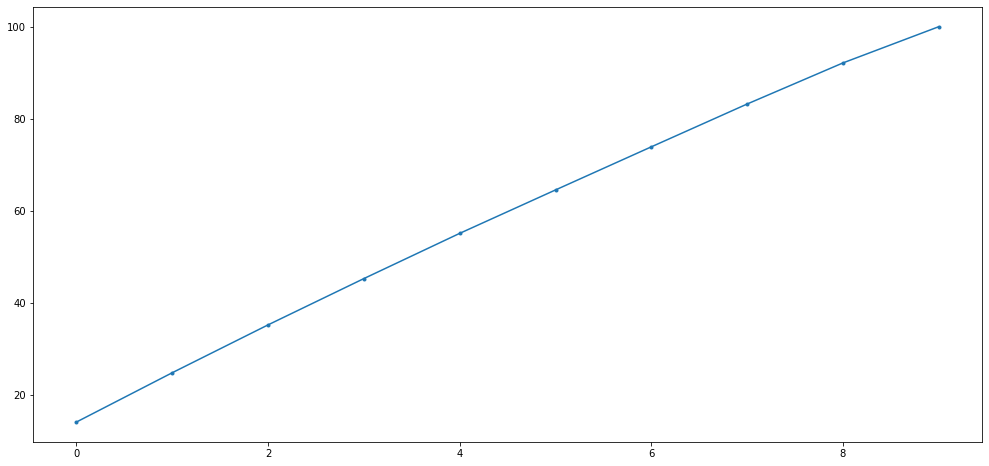

In [54]:
plt.plot(percentage,marker=".")

#### All features are equally important.

## Cost Functions

In [108]:
def MAPE(actual,predicted):
    return np.mean((np.abs(actual-predicted)/actual))*100

from sklearn.metrics import mean_squared_error

# Training and testing splitting

In [109]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(balanced_X,balanced_y,test_size=0.3,random_state=12)
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((11148, 10), (4778, 10), (11148, 1), (4778, 1))

# Model fitting and Model Training

### 1. Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
Logi_model=LogisticRegression()
Logi_model.fit(train_X,train_y)

LogisticRegression()

In [111]:
y_train_pred=Logi_model.predict(train_X)
y_train_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [112]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
Logi_ac_train=(accuracy_score(train_y,y_train_pred))*100
Logi_ac_train

70.0394689630427

In [113]:
Logi_train_cm=confusion_matrix(train_y,y_train_pred)
Logi_train_cm

array([[3988, 1627],
       [1713, 3820]], dtype=int64)

In [114]:
Logi_train_clreport=classification_report(train_y,y_train_pred)
print(Logi_train_clreport)

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      5615
           1       0.70      0.69      0.70      5533

    accuracy                           0.70     11148
   macro avg       0.70      0.70      0.70     11148
weighted avg       0.70      0.70      0.70     11148



In [117]:
Logi_train_RMSE=np.sqrt(mean_squared_error(train_y,y_train_pred))
Logi_train_RMSE=Logi_train_RMSE*100
Logi_train_RMSE

54.73621382316948

In [92]:
fpr,tpr,threshold=roc_curve(train_y,Logi_model.predict_proba(train_X)[:,1])
Logi_train_auc=roc_auc_score(train_y,y_train_pred)
print(Logi_train_auc)

0.7003217318770129


Text(0, 0.5, 'True Positive Rate')

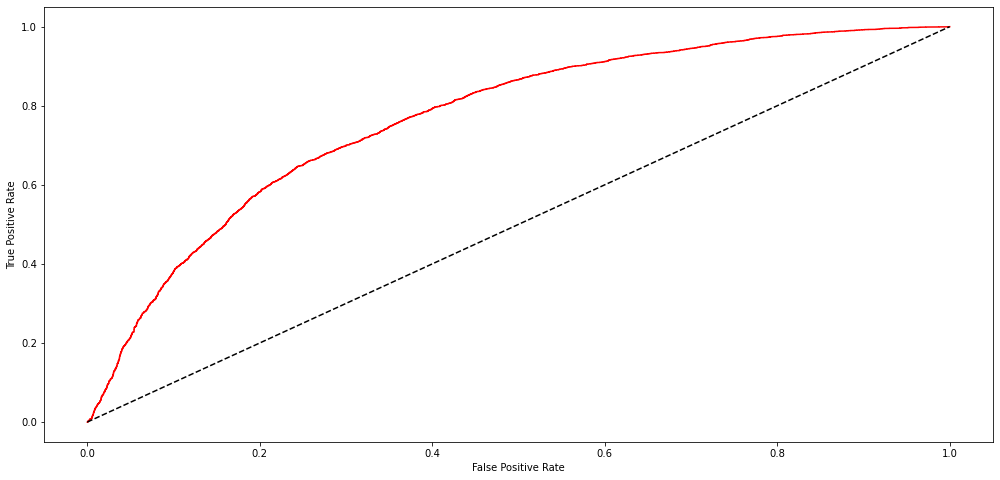

In [93]:
plt.plot(fpr,tpr,color="red",label="logit model (area=%0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [94]:
y_test_pred=Logi_model.predict(test_X)
y_test_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [95]:
Logi_ac_test=(accuracy_score(test_y,y_test_pred))*100
Logi_ac_test

70.42695688572624

In [96]:
Logi_test_cm=confusion_matrix(test_y,y_test_pred)
Logi_test_cm

array([[1696,  652],
       [ 761, 1669]], dtype=int64)

In [97]:
Logi_test_clreport=classification_report(test_y,y_test_pred)
print(Logi_test_clreport)

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      2348
           1       0.72      0.69      0.70      2430

    accuracy                           0.70      4778
   macro avg       0.70      0.70      0.70      4778
weighted avg       0.70      0.70      0.70      4778



In [119]:
Logi_test_RMSE=np.sqrt(mean_squared_error(test_y,y_test_pred))
Logi_test_RMSE=Logi_test_RMSE*100
Logi_test_RMSE

54.38110252125619

In [98]:
from sklearn.metrics import roc_curve,roc_auc_score

In [99]:
fpr,tpr,threshold=roc_curve(test_y,Logi_model.predict_proba(test_X)[:,1])
Logi_test_auc=roc_auc_score(test_y,y_test_pred)
print(Logi_test_auc)

0.7045740705687706


Text(0, 0.5, 'True Positive Rate')

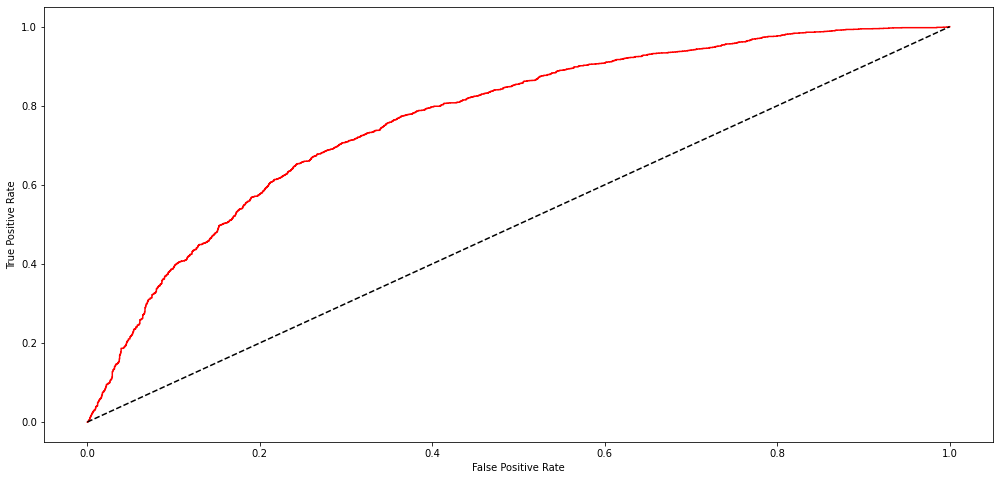

In [100]:
plt.plot(fpr,tpr,color="red",label="logit model (area=%0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

### Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100)
RF_model.fit(train_X,train_y)

RandomForestClassifier()

In [72]:
#training
rf_train_prediction=RF_model.predict(train_X)
rf_train_accuracy_score=accuracy_score(train_y,rf_train_prediction)
rf_train_accuracy_score=rf_train_accuracy_score*100
print("accuracy train score is :",rf_train_accuracy_score)
print("*"*50)
print("Confusion metrix is :")
rf_train_cm=confusion_matrix(train_y,rf_train_prediction)
print(rf_train_cm)
print("*"*50)
print("classification report is :")
rf_train_CR=classification_report(train_y,rf_train_prediction)
print(rf_train_CR)

accuracy train score is : 100.0
**************************************************
Confusion metrix is :
[[5615    0]
 [   0 5533]]
**************************************************
classification report is :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5615
           1       1.00      1.00      1.00      5533

    accuracy                           1.00     11148
   macro avg       1.00      1.00      1.00     11148
weighted avg       1.00      1.00      1.00     11148



In [120]:
RF_train_RMSE=np.sqrt(mean_squared_error(train_y,rf_train_prediction))
RF_train_RMSE=RF_train_RMSE*100
RF_train_RMSE

0.0

In [73]:
# Testing 
rf_test_prediction=RF_model.predict(test_X)
rf_test_accuracy_score=accuracy_score(test_y,rf_test_prediction)
rf_test_accuracy_score=rf_test_accuracy_score*100
print("accuracy test score is :",rf_test_accuracy_score)
print("*"*50)
print("Confusion metrix is :")
rf_test_cm=confusion_matrix(test_y,rf_test_prediction)
print(rf_test_cm)
print("*"*50)
print("classification report is :")
rf_test_CR=classification_report(test_y,rf_test_prediction)
print(rf_test_CR)

accuracy test score is : 90.07953118459606
**************************************************
Confusion metrix is :
[[2119  229]
 [ 245 2185]]
**************************************************
classification report is :
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2348
           1       0.91      0.90      0.90      2430

    accuracy                           0.90      4778
   macro avg       0.90      0.90      0.90      4778
weighted avg       0.90      0.90      0.90      4778



In [121]:
RF_test_RMSE=np.sqrt(mean_squared_error(test_y,rf_test_prediction))
RF_test_RMSE=RF_test_RMSE*100
RF_test_RMSE

31.49677573245226